In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


In [3]:
dataset = load_iris()
temp = train_test_split(dataset.data, dataset.target, test_size=0.2)
train_data,test_data,train_labels,test_labels=temp
dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
transformar = StandardScaler()
transformar.fit(train_data)
train_data = transformar.transform(train_data)
test_data = transformar.transform(test_data)

In [9]:
MultiCapa = MLPClassifier(hidden_layer_sizes = (10,10), activation='logistic', max_iter = 10000)
MultiCapa.fit(train_data, train_labels)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 10),
              max_iter=10000)

In [10]:
predict = MultiCapa.predict(test_data)
print("Comparacion")
print(predict)
print(test_labels)

Comparacion
[1 2 2 2 2 1 1 1 0 1 2 1 1 0 0 0 2 2 2 0 2 1 1 2 0 1 1 1 2 0]
[1 2 2 2 2 1 1 1 0 1 2 1 1 0 0 0 2 1 2 0 2 1 1 2 0 1 1 1 2 0]


In [20]:
predictions_test = MultiCapa.predict(test_data)
print(accuracy_score(predictions_test, test_labels))
print(confusion_matrix(predictions_test, test_labels))
print(classification_report(predictions_test, test_labels))

0.9666666666666667
[[ 7  0  0]
 [ 0 12  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        12
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



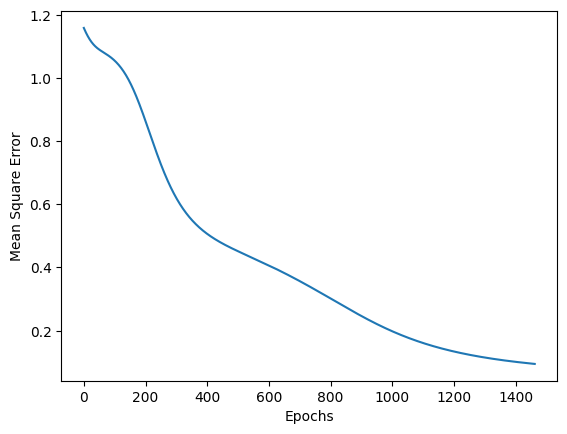

In [12]:
plt.ylabel('Mean Square Error')
plt.xlabel('Epochs')
plt.plot(MultiCapa.loss_curve_)
plt.show()